In [ ]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import matplotlib as mpl
from pandas import Series

In [ ]:
from google import colab
colab.drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/portfolio/pre_cohort_data/user_data.csv', index_col = 0)
data_2 = pd.read_csv('/content/drive/MyDrive/portfolio/after_cohort_data/user_data.csv', index_col = 0)

In [ ]:
weekday = [dt for dt in data['ACT_DATE'].drop_duplicates().tolist() if date(int(dt[0:4]), int(dt[5:7]), int(dt[8:10])).weekday() <5]
weekday_2 = [dt for dt in data_2['ACT_DATE'].drop_duplicates().tolist() if date(int(dt[0:4]), int(dt[5:7]), int(dt[8:10])).weekday() <5]

In [ ]:
weekday_data = data[data['ACT_DATE'].isin(weekday)].copy(deep=True)
weekday_data_2 = data_2[data_2['ACT_DATE'].isin(weekday_2)].copy(deep=True)

In [ ]:
portfolio_weekday_data = weekday_data[weekday_data['INTEREST_FIELD']=='Portfolio'].copy(deep=True)
portfolio_weekday_data_2 = weekday_data_2[weekday_data_2['INTEREST_FIELD']=='Portfolio'].copy(deep=True)

In [ ]:
portfolio_weekday_data['INTEREST_FIELD'] = portfolio_weekday_data['INTEREST_FIELD'].map(lambda x: 'Before_Portfolio') 
portfolio_weekday_data_2['INTEREST_FIELD'] = portfolio_weekday_data_2['INTEREST_FIELD'].map(lambda x: 'After_Portfolio') 

In [ ]:
total_portfolio_weekday_data = pd.concat([portfolio_weekday_data, portfolio_weekday_data_2])

In [ ]:
total_portfolio_weekday_data['CohortGroup'] = total_portfolio_weekday_data.groupby(level=0)['ACT_DATE'].min()
total_portfolio_weekday_data.reset_index(inplace=True)

In [ ]:
grouped = total_portfolio_weekday_data.groupby(['INTEREST_FIELD', 'ACT_DATE'])

In [ ]:
cohorts = grouped.agg({'USER_SEQ': pd.Series.nunique})

In [ ]:
cohorts.rename(columns={'USER_SEQ': 'TotalUsers',
                        }, inplace=True)

In [ ]:
def cohort_period(data):
  data['CohortPeriod'] = np.arange(len(data)) + 1
  return data

In [ ]:
cohorts = cohorts.groupby(level=0).apply(cohort_period)

In [ ]:
cohorts = cohorts.reset_index()

In [ ]:
first_day_users = cohorts[cohorts['CohortPeriod']==1].copy(deep=True)

In [ ]:
divide_point = len(portfolio_weekday_data_2['ACT_DATE'].drop_duplicates().to_list())

In [ ]:
after_first_day_users = first_day_users.loc[0]['TotalUsers']
before_first_day_users = first_day_users.loc[divide_point]['TotalUsers']

In [ ]:
cohorts_before = cohorts[cohorts['INTEREST_FIELD']=='Before_Portfolio'].copy(deep=True)
cohorts_after = cohorts[cohorts['INTEREST_FIELD']=='After_Portfolio'].copy(deep=True)
cohorts_before['retention_rate'] = cohorts_before['TotalUsers'].map(lambda x: x/before_first_day_users)
cohorts_after['retention_rate'] = cohorts_after['TotalUsers'].map(lambda x: x/after_first_day_users)

In [ ]:
cohorts = pd.concat([cohorts_before, cohorts_after])

In [ ]:
cohorts = cohorts.drop(['ACT_DATE', 'TotalUsers'], axis=1)

In [ ]:
grouped = cohorts.groupby(['INTEREST_FIELD', 'CohortPeriod'])

In [ ]:
cohort_retention = grouped.agg({'retention_rate': np.sum})

In [ ]:
cohort_retention

retention_rate
INTEREST_FIELD   CohortPeriod                
After_Portfolio  1                       1.00
                 2                       0.45
                 3                       0.35
                 4                       0.25
                 5                       0.23
Before_Portfolio 1                       1.00
                 2                       0.25
                 3                       0.15
                 4                       0.10
                 5                       0.08

In [ ]:
user_retention = cohort_retention['retention_rate'].unstack(0).divide([1,1], axis=1)
user_retention.head(10)

INTEREST_FIELD,After_Portfolio,Before_Portfolio
CohortPeriod,,
1,1.00,1.00
2,0.45,0.25
3,0.35,0.15
4,0.25,0.10
5,0.23,0.08


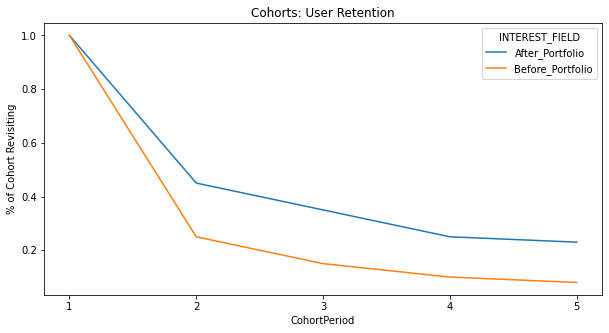

In [ ]:
values = [i for i in range(1,6)] 
user_retention [['After_Portfolio', 'Before_Portfolio']].plot(figsize=(10,5))
plt.xticks(values)
plt.title('Cohorts: User Retention')
plt.ylabel('% of Cohort Revisiting');